# Exercícios em Mineração de Dados
##Equipe

- Mirian Sampaio Faria - 538543
- Jonathan Davi Sampaio Faria - 496357

# 1a parte: Questões sobre os métodos vistos em sala.

### 1) O que é uma transformação de atributo? Cite um exemplo de como isto pode ajudar os métodos de aprendizado.
R: Transformação de atributo é o processo de modificação dos dados para facilitar a análise, a modelagem e o processo de aprendizado de máquina. Por exemplo, podemos transformar um atributo nominal em atributos binários para cada caso único do atributo.
### 2) Por que gráficos de dispersão dos dados são interessantes de serem observados antes de fazer o aprendizado supervisionado?
R: Porque podemos identificar padrões e outliers e isso ajuda na decisão dos métodos de modelagem que serão usados.
### 3) Qual é o motivo pelo qual os dados podem não ser IID (independentes e identicamente distribuídos) no exemplo de filtragem de spam de e-mail da aula?
R: Como a filtragem de spam usando Naive Bayes utiliza palavras chave e o teorema de Bayes para identificar se se o email é spam ou não, os dados podem não ser independentes, pois o modelo irá verificar os emails buscando uma correlação com as palavras-chave já descobertas, e podem não ser identicamente distribuidos pois o conteúdo do email não é fixo, pode mudar de acordo com a época do ano e com novos métodos e palavras-chave novas que forem surgindo para tentar ficar à frente dos filtros de spam.
### 4) Qual é a diferença entre um conjunto de validação e um conjunto de teste?
R: O conjunto de validação é um processo intermediário que utiliza uma parte do conjunto de treinamento para avaliar e otimizar um modelo. O conjunto de testes são dados que não foram usados no treinamento do modelo para avaliar o desempenho do modelo.
### 5) Por que não podemos (normalmente) usar o erro de treinamento para selecionar um hiperparâmetro?
R: Pois a independência dos dados será violada, ou seja, os mesmos dados serão usados no treinamento e no reajuste de hiperparâmetros e isso prejudicará o desempenho do modelo, que selecionará então hiperparâmetros subótimos, dando uma estimativa enganosa e enviesando o modelo.
### 6) Naïve Bayes faz a suposição de que todos os recursos são condicionalmente independentes, dado o rótulo da classe. Por que essa suposição é necessária e o que aconteceria sem ela?
R: Porque a probabilidade da classe dado o atributo envolve somente o atributo e a classe, caso não fossem independentes seria necessário calcular a probabilidade do atributo dado todos os outros atributos, o que seria inviável.
### 7) Por que o KNN é considerado um método não paramétrico e quais são as consequências indesejáveis ​​do design não paramétrico do KNN?
R: O KNN é considerado um método não paramétrico, pois não faz suposições sobre a distribuição dos dados, ele armazena os dados de treinamento e toma decisões a partir do vizinho mais próximo no momento que uma previsão é solicitada. Sendo assim, a distância para o vizinho mais próximo determina o custo da operação e pode resultar em problemas de precisão caso a distância entre eles seja muito grande ou muito pequena ou tenha outiliers; o espaço necessário para comportar o modelo depende do tanto de dados de treinamento armazenados, podendo ocupar muito espaço de máquina. Ou seja, o KNN é mais recomendado para conjunto de dados menores e de baixa dimensão.
### 8) Para qualquer modelo paramétrico, como o aumento do número de exemplos de treinamento afeta as duas partes do custo-benefício fundamental?
R: O aumento do número de examplos pode levar a um melhor treinamento do modelo, porém isso demanda tempo e energia, tanto para o processo de treinamento quanto para a aquisição dos novos exemplos.
### 9) Tanto o aprendizado supervisionado quanto os modelos de agrupamento recebem uma entrada x_i e produzem um rótulo y_i. Qual é a principal diferença?
R: A principal diferença é que no aprendizado supervisionado há rótulos pré-definidos utilizados para treinar o modelo, enquanto que no agrupamento o objetivo é encontrar padrões ou estruturas nos dados, gerando rótulos baseados em alguma métrica descoberta pelo modelo.
### 10) No agrupamento k-means, os clusters são garantidamente regiões convexas. As áreas que recebem o mesmo rótulo por KNN também são convexas?
R: Não necessariamente, pois o KNN depende da distância entre os vizinhos mais próximos, o que pode criar fronteiras irregulares, dependendo da distribuição dos pontos. Isso implicaria na possível existência de regiões não convexas.

# Inicialização

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay
import seaborn as sns

# 2a parte: Aplicando modelos de aprendizado supervisionado.

## Detecção de fraude em cartão de crédito

###Leitura do arquivo csv

In [6]:
df_cc = pd.read_csv("/content/creditcard.csv")
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Mostrar o conjunto de dados e contagem de classe

In [8]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df_cc.groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

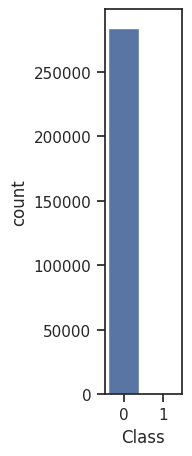

In [ ]:
plt.figure(figsize=(1,5))
sns.countplot(data=df_cc, x='Class')
plt.show()

###Gráficos de dispersão

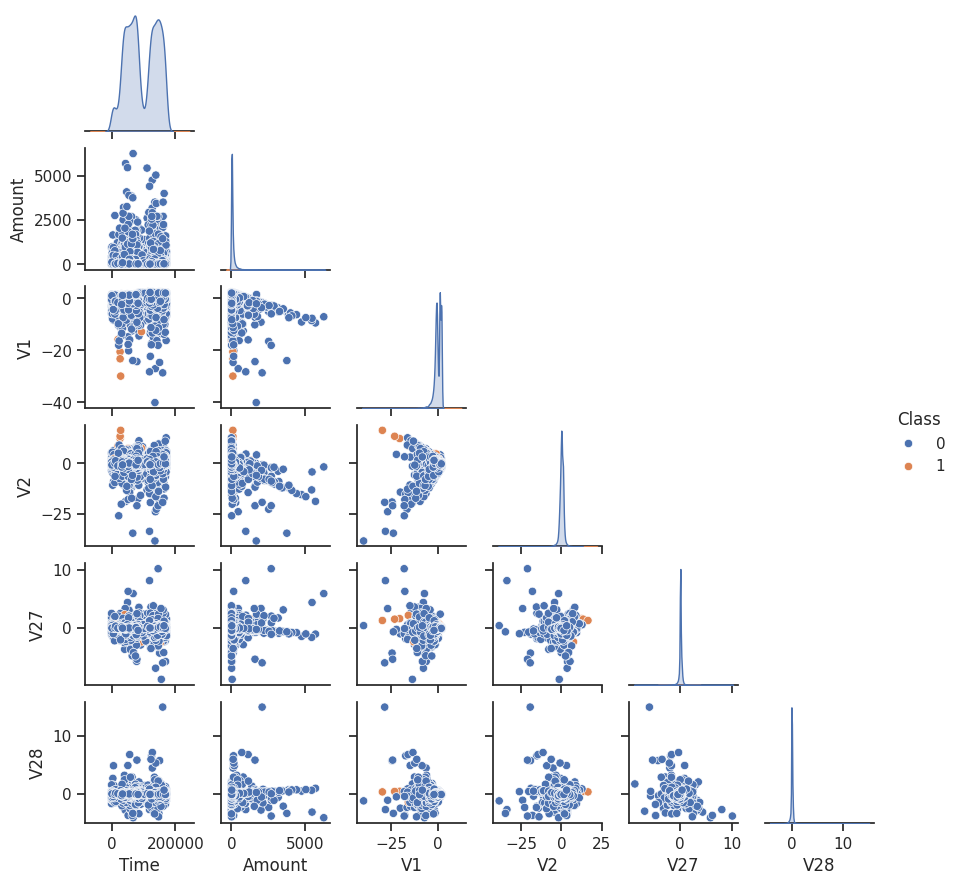

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df_cc[['Time', 'Amount', 'V1', 'V2', 'V27', 'V28', 'Class']].sample(20000), hue="Class", corner=True, height=1.5)

###Definindo X e y

In [ ]:
X_cc = df_cc.loc[:, df_cc.columns != "Class"]
X_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y_cc = df_cc["Class"]
y_cc.head()

,Class
0,0
1,0
2,0
3,0
4,0


###Fazendo a divisão entre treinamento e teste

In [ ]:
X_cc_train, X_cc_test, y_cc_train, y_cc_test = train_test_split(X_cc, y_cc, test_size = 0.25, random_state = 0)

###Treinando o filtro de fraudes

In [ ]:
classifier_cc = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier_cc.fit(X_cc_train, y_cc_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

###Predição para casos de teste

In [ ]:
y_cc_pred = classifier_cc.predict(X_cc_test)
y_cc_pred

array([0, 0, 0, ..., 0, 0, 0])

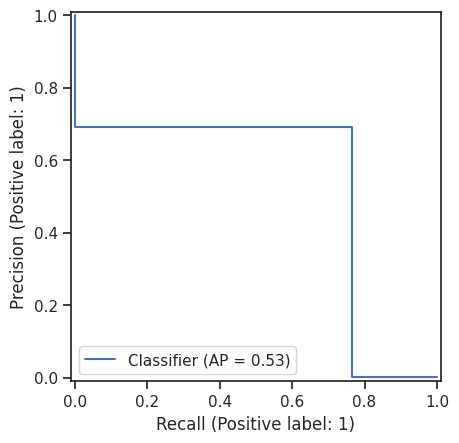

In [ ]:
PrecisionRecallDisplay.from_predictions(y_cc_test, y_cc_pred)
plt.show()

In [ ]:
count = 0
for i in range(len(y_cc_test)):
    if y_cc_test.iloc[i] != y_cc_pred[i]:
        count += 1
print('Número total de testes', len(y_cc_test))
print('Número de erros', count)

Número total de testes 71202
Número de erros 69


###Checando quais foram os erros nas predições

In [ ]:
X_cc_test[y_cc_test != y_cc_pred]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
158680,111638.0,-2.261464,0.220504,-3.559337,1.522415,-4.920528,0.846771,0.572077,0.865553,-1.065028,...,0.192833,0.466701,0.060959,1.367563,0.001305,-2.068689,-1.266800,1.017191,0.116849,798.49
260585,159625.0,-4.821851,5.051815,-2.027710,2.942230,-0.765532,6.174986,-12.365483,-25.614474,-4.362249,...,6.598330,-12.304860,4.753501,0.691750,-0.894155,0.041622,3.067907,-0.367347,0.506199,0.00
263080,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,-0.211167,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00
231978,146998.0,-2.064240,2.629739,-0.748406,0.694992,0.418178,1.392520,-1.697801,-6.333065,1.724184,...,-1.424486,6.215514,-1.276909,0.459861,-1.051685,0.209178,-0.319859,0.015434,-0.050117,8.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15168,26525.0,-3.156608,-2.895171,3.300964,1.550562,16.160824,-8.710536,-17.936966,0.492347,1.851809,...,-1.444388,0.831647,-4.120410,-26.751119,0.002922,-7.495741,-0.376964,1.811647,1.056891,8.94
237800,149397.0,-1.142199,-2.988773,-0.298093,-1.379210,2.588149,-2.368300,-1.417269,-0.012458,-0.536215,...,0.599568,0.790943,1.518132,0.708689,0.736077,-1.824686,-0.480342,0.070206,0.173133,20.10
115268,73811.0,1.291827,0.330798,0.208409,0.772020,0.259846,0.087512,0.016522,-0.113289,0.032384,...,0.041316,-0.258757,-0.685083,-0.088874,-1.007759,0.538581,-0.543304,0.044211,0.025863,14.99
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.172659,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.00


###Utilizando a função report para ter melhores detalhes

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_cc_pred, y_cc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71069
           1       0.77      0.69      0.73       133

    accuracy                           1.00     71202
   macro avg       0.88      0.85      0.86     71202
weighted avg       1.00      1.00      1.00     71202



### Análise

Pela coluna de precisão, vemos que de todas as fraudes que o modelo previu que teria, 77% delas realmente eram fraudes. Pela coluna recall temos que das fraudes que aconteceram, o modelo previu coretamente 69% delas. Como o f1-score mede a eficiência do modelo quanto mais o valor se aproxima de 1, temos que o modelo é 100% eficiente em prever quando a transação não é fraude, e 73% eficiente em prever quando é fraude.

## Titanic - Aprendizado com o desastre

###Leitura do arquivo csv

In [3]:
df_tt = pd.read_csv("/content/titanic.csv")
df_tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Visualizando o conjunto de dados

In [4]:
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Verificando dados nulos

In [ ]:
df_tt[df_tt.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df_tt.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


###Tratando os dados da tabela

In [ ]:
df_tt_treated = df_tt.join(pd.get_dummies(df_tt['Pclass'], prefix='Pclass', dtype=int)) \
                     .join(pd.get_dummies(df_tt['Sex'], prefix='Sex', dtype=int)) \
                     .join(pd.get_dummies(df_tt['Embarked'], prefix='Embarked', dtype=int)) \
                     .join(pd.get_dummies(df_tt['Cabin'], prefix='Cabin', dtype=int)) \
                     .drop(columns=['PassengerId', 'Name', 'Pclass', 'Sex', 'Embarked', 'Ticket', 'Cabin'])
df_tt_treated.fillna({ 'Age': df_tt_treated['Age'].median() }, inplace=True)
df_tt_treated

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,22.0,1,0,7.2500,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
887,1,19.0,0,0,30.0000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
888,0,28.0,1,2,23.4500,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


###Gráficos de dispersão

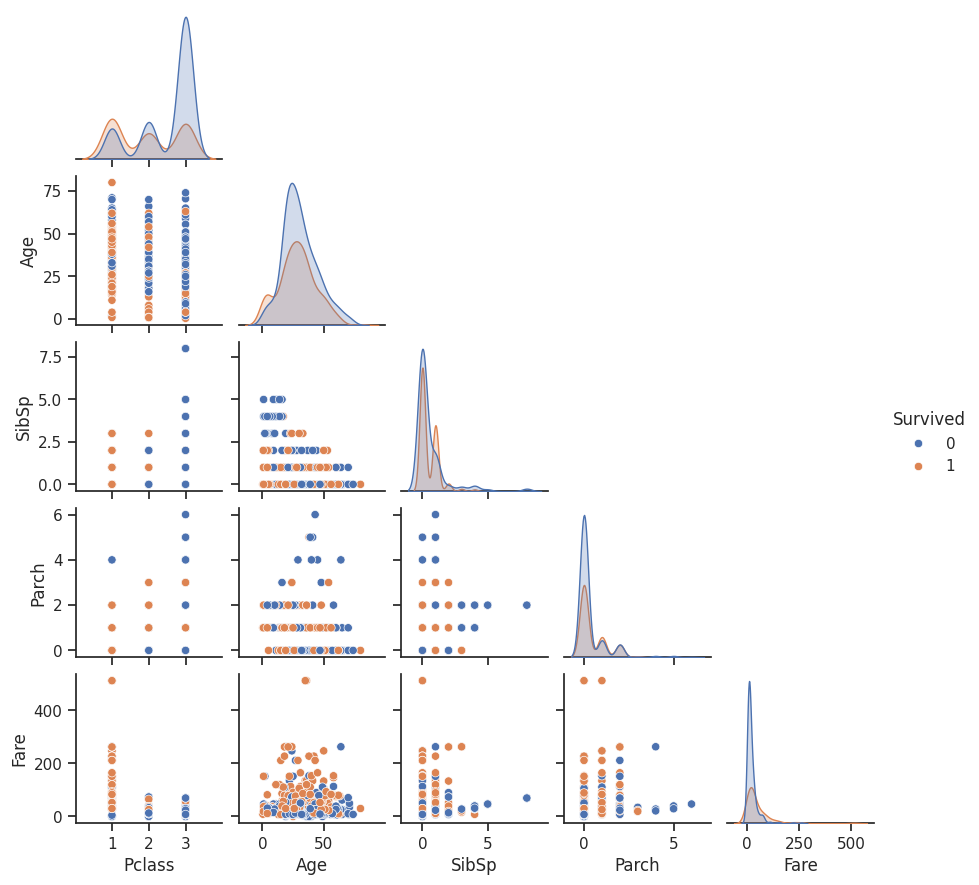

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df_tt.drop('PassengerId', axis=1), hue="Survived", corner=True, height=1.8)

### Definindo X e y

In [ ]:
X_tt = df_tt_treated.loc[:, df_tt_treated.columns != "Survived"]
X_tt.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,22.0,1,0,7.2500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.0,1,0,53.1000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_tt = df_tt_treated["Survived"]
y_tt.head()

,Survived
0,0
1,1
2,1
3,1
4,0


###Fazendo a divisão entre treinamento e teste

In [ ]:
X_tt_train, X_tt_test, y_tt_train, y_tt_test = train_test_split(X_tt, y_tt, test_size = 0.25, random_state = 0)

###Treinando o modelo para filtrar sobreviventes e não-sobreviventes

In [ ]:
classifier_tt = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier_tt.fit(X_tt_train, y_tt_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

###Predição para casos de teste

In [ ]:
y_tt_pred = classifier_tt.predict(X_tt_test)
y_tt_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

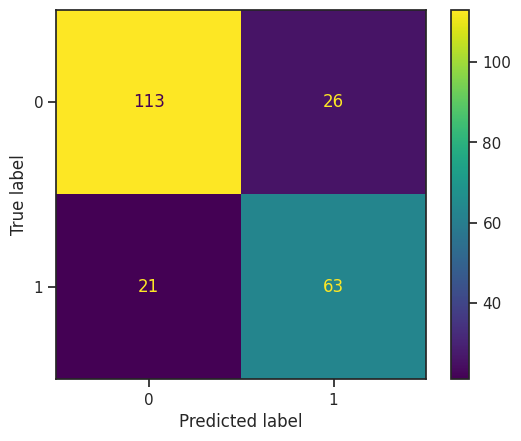

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_tt_test, y_tt_pred)
plt.show()

In [ ]:
count = 0
for i in range(len(y_tt_test)):
    if y_tt_test.iloc[i] != y_tt_pred[i]:
        count += 1
print('Número total de testes', len(y_tt_test))
print('Número de erros', count)



Número total de testes 223
Número de erros 47


###Checando quais foram os erros das predições

In [ ]:
X_tt_test[y_tt_test != y_tt_pred]

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
474,22.0,0,0,9.8375,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
55,28.0,0,0,35.5000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
883,28.0,0,0,10.5000,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
587,60.0,1,1,79.2000,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
97,23.0,0,1,63.3583,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
839,28.0,0,0,29.7000,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
301,28.0,2,0,23.2500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
60,22.0,0,0,7.2292,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
567,29.0,0,4,21.0750,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
890,32.0,0,0,7.7500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


###Utilizando a função report para ter melhores detalhes

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_tt_pred, y_tt_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       134
           1       0.75      0.71      0.73        89

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



### Análise
Olhando para a coluna precisão, vemos que a porcentagem de acertos é menor para sobreviventes, com 75% de acertos, versus 81% de acertos para não-sobreviventes, do total previsto pelo modelo em cada categoria. Pela coluna recall, temos que dos sobreviventes que realmente existiram, o modelo previu corretamente 71% deles. Então a maior parte dos erros veio de não-sobreviventes previstos como sobreviventes. Baseado na coluna f1-score, que pontua a eficiência do modelo quanto mais próximo o valor de 1, ele tem eficência de 73% para sobreviventes e 83% para não-sobreviventes. Como a acurácia está em 79%, e estamos avaliando quem sobreviveria, o erro não parece aceitável e esse modelo poderia ser melhorado.

# 3a parte: agrupamento de países por dados sócio-econômicos

###Leitura do arquivo csv

In [9]:
df_cd = pd.read_csv("/content/Country-data.csv")
df_cd.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###Visualizando o conjunto de dados

In [10]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
df_cd.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


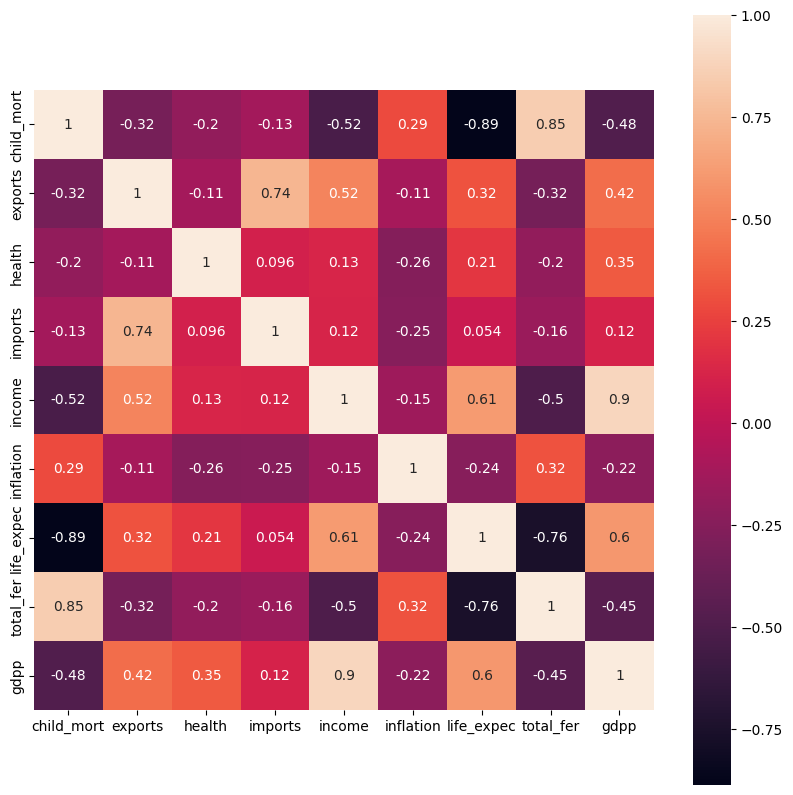

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cd.corr(numeric_only=True),annot=True,square=True)
plt.show()

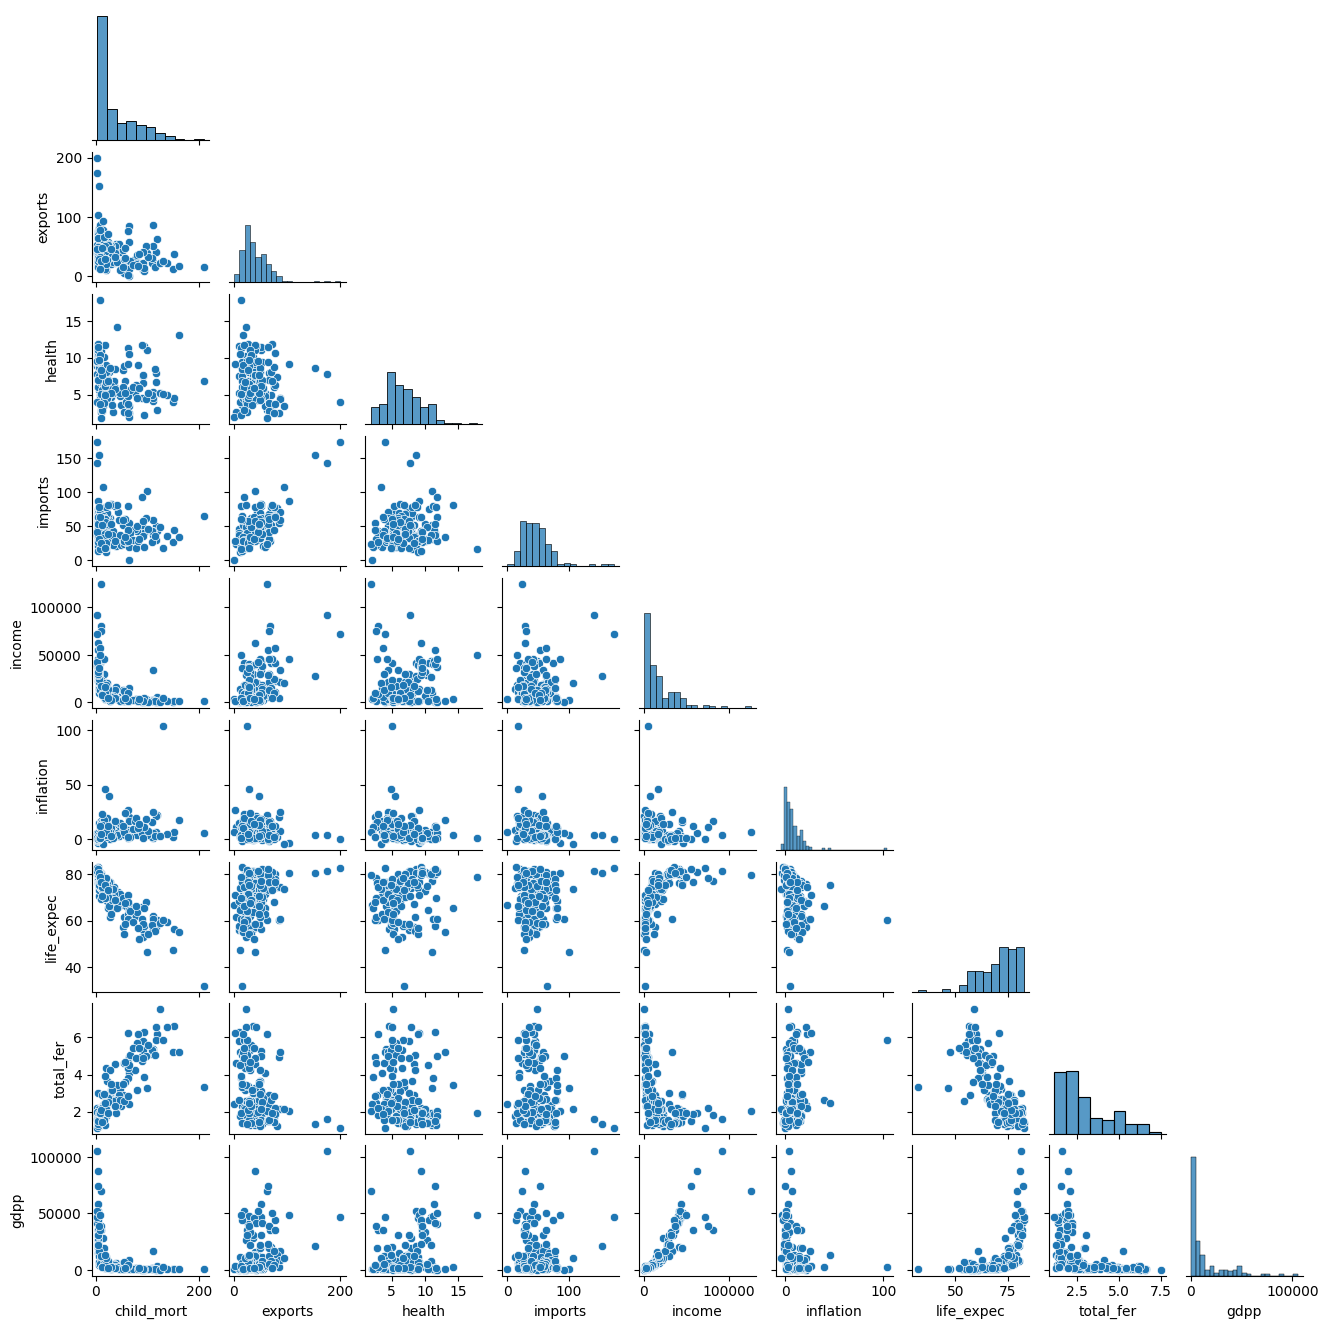

In [13]:
sns.pairplot(df_cd, corner=True, height=1.5)
plt.show()

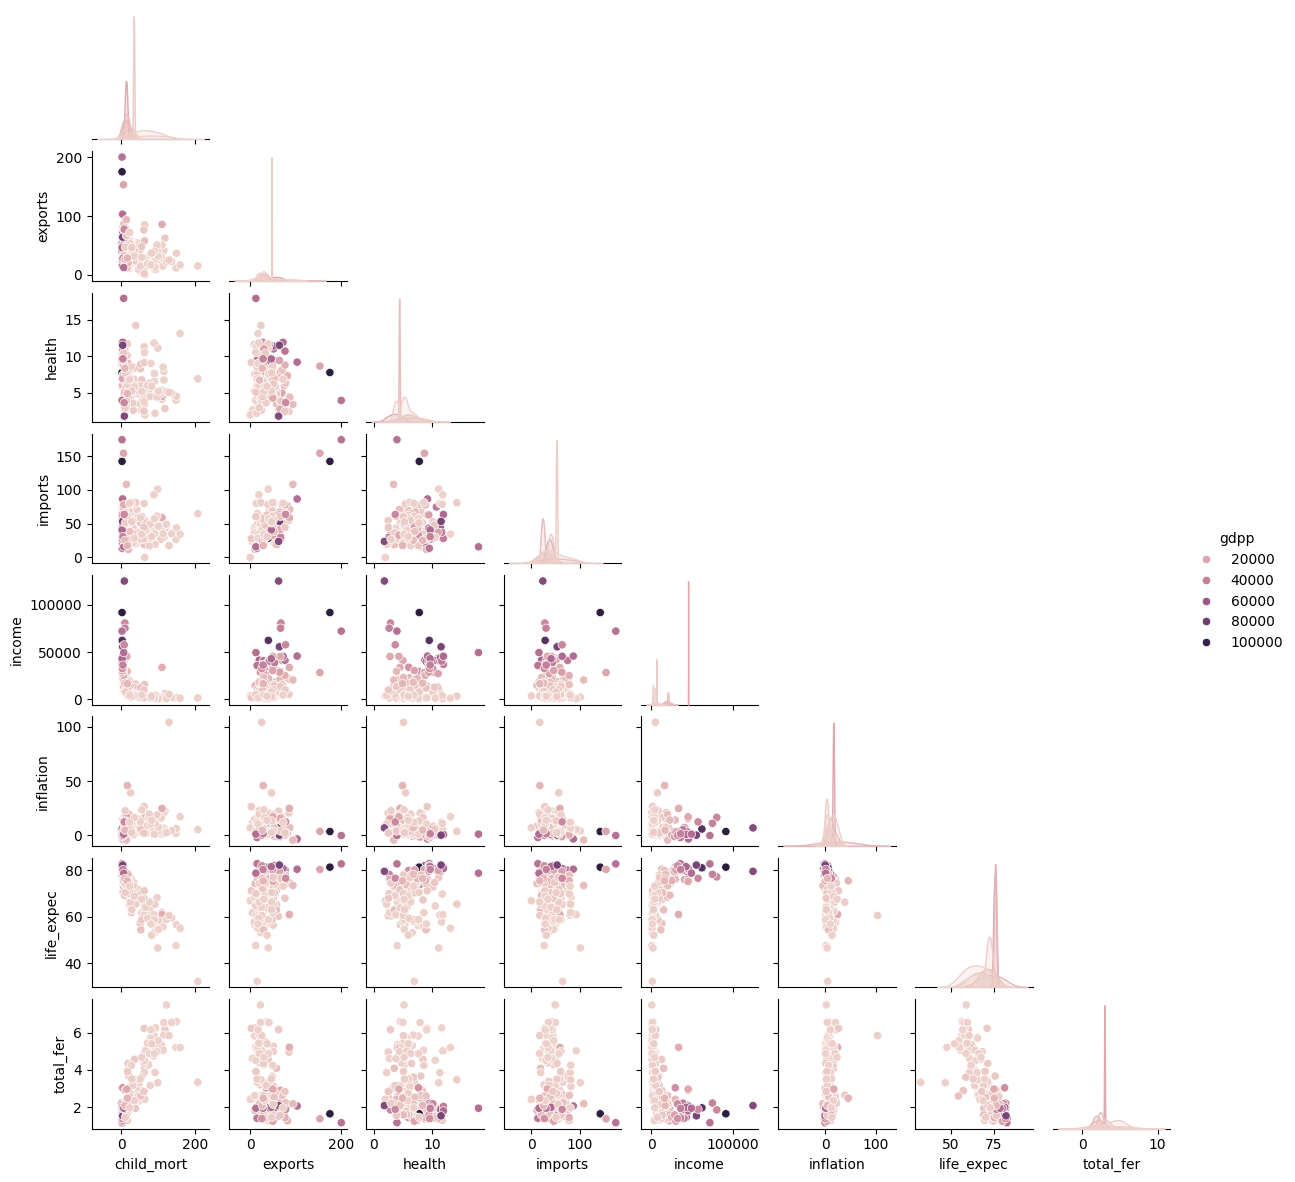

In [14]:
sns.pairplot(df_cd, hue='gdpp', corner=True, height=1.5)
plt.show()

###Treinando o modelo com o método k-Means

In [15]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_cd.loc[:, df_cd.columns != 'country'])

In [16]:
df_cd['cluster'] = kmeans.labels_

###Visualizando os clusters encontrados pelo modelo

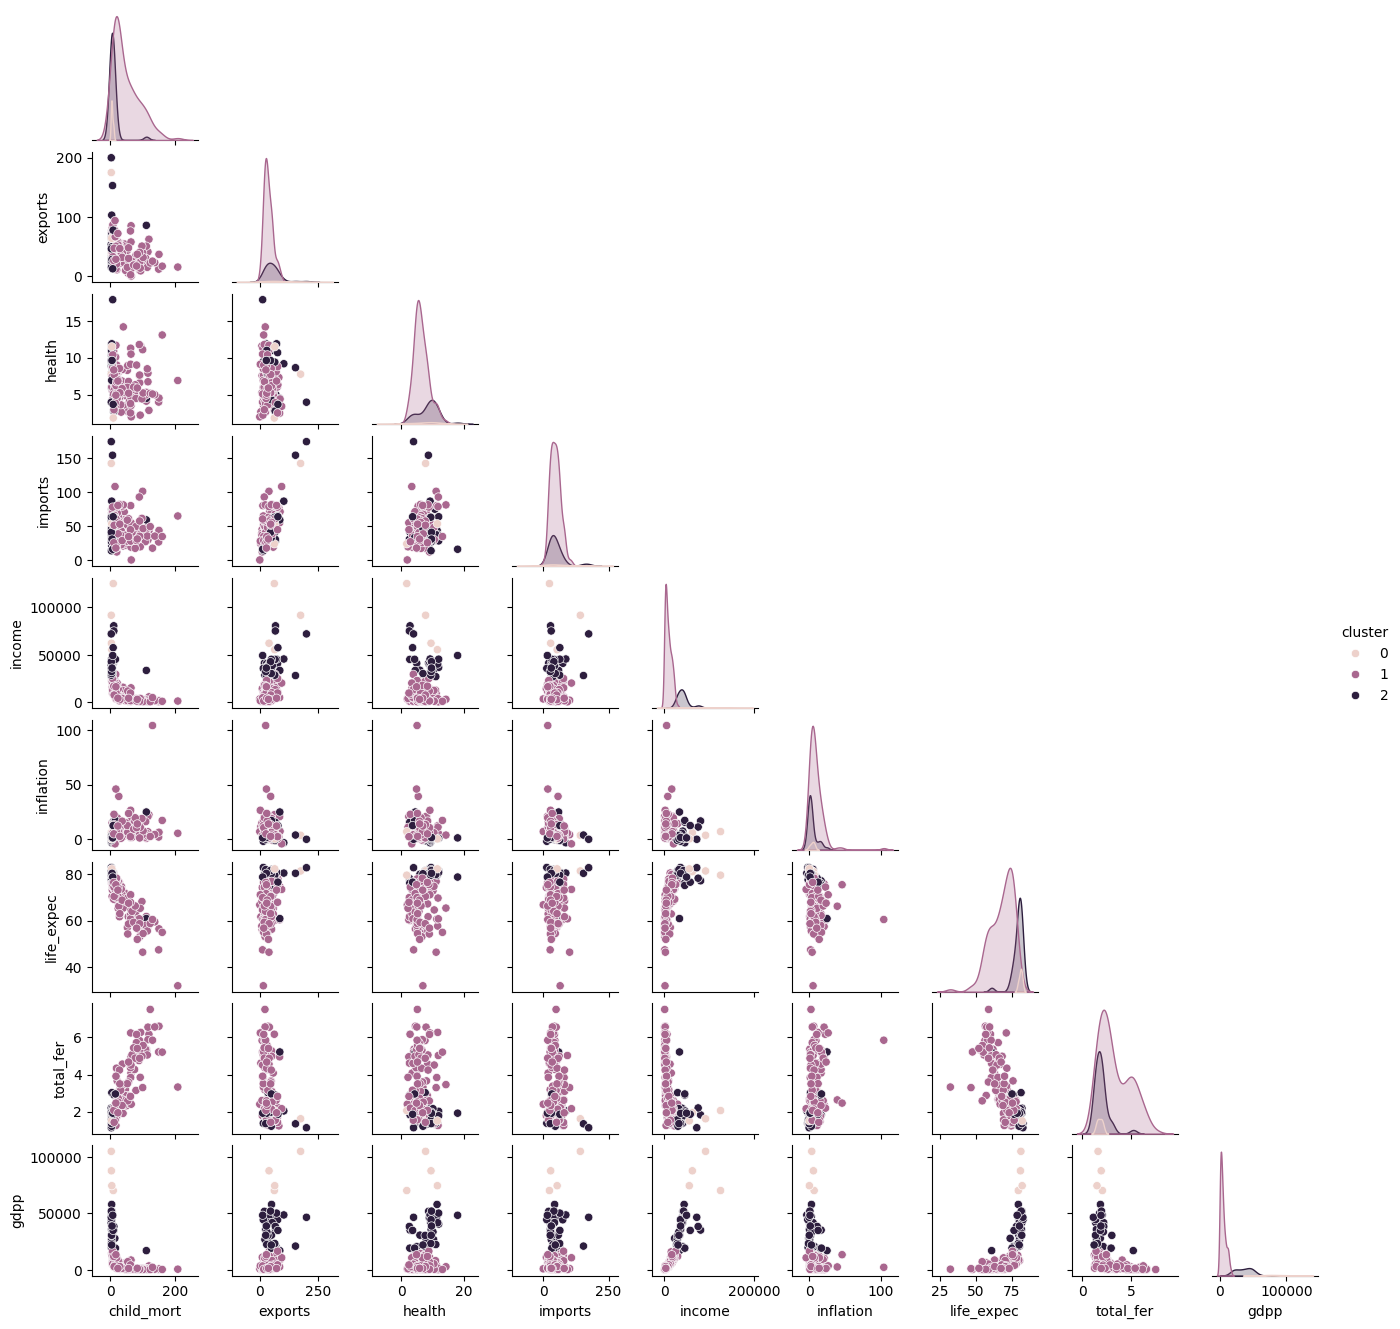

In [17]:
sns.pairplot(df_cd, hue='cluster', corner=True, height=1.5)
plt.show()

###Mostrando os clusters em ordem de necessidade

In [18]:
display(df_cd.cluster.value_counts())

,count
cluster,
1,128
2,35
0,4


In [ ]:
df_cd_average = pd.DataFrame(df_cd.groupby('cluster').agg({'gdpp':'mean', 'income':'mean', 'inflation':'mean', 'exports':'mean', 'imports':'mean',\
                                     'health':'mean', 'child_mort':'mean', 'life_expec':'mean', 'total_fer':'mean'}))

display(df_cd_average.sort_values(by = ['child_mort', 'total_fer', 'health', 'life_expec', 'income'],\
                                     ascending = [False, False, True, True, True]))


,gdpp,income,inflation,exports,imports,health,child_mort,life_expec,total_fer
cluster,,,,,,,,,
1,4438.390625,8569.242188,8.957648,35.865617,45.921609,6.332031,47.389844,67.873437,3.263359
2,35977.142857,40908.571429,3.889143,55.240000,48.717143,8.490286,8.734286,79.171429,1.926571
0,84425.000000,83625.000000,4.216750,85.250000,61.900000,7.640000,4.875000,81.000000,1.792500


###Mostrando os países pertencentes ao cluster identificado como a opção que mais precisa de investimento

In [ ]:
country_cluster=list(df_cd[df_cd['cluster']==1].country)
country_cluster

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'M

#Análise
Analisando a relação entre as médias de gdpp, renda, saúde e mortalidade infantil, podemos concluir que os países que mais precisam de ajuda, de acordo com o modelo, são os países do cluster 1.